In [4]:
# Importing packages thats being used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Path configuration
movies = (
    "/Users/joeloscarsson/Documents/www/Machine-Learning/Projects/data3/movies1.csv"
)
ratings = (
    "/Users/joeloscarsson/Documents/www/Machine-Learning/Projects/data3/ratings1.csv"
)


# loading in data and setting data types
df_movies = pd.read_csv(
    movies, usecols=["movieId", "title"], dtype={"movieId": "int32", "title": "str"}
)
df_ratings = pd.read_csv(
    ratings,
    usecols=["userId", "movieId", "rating"],
    dtype={"userId": "int32", "movieId": "int32", "rating": "float32"},
)


In [6]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [7]:
# Checking datatypes and entries
print(df_movies.info())

# We have 58098 Movies in this dataset
print(df_movies.describe())

# We have zero NaN values... for now...
print(df_movies.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
dtypes: int32(1), object(1)
memory usage: 681.0+ KB
None
             movieId
count   58098.000000
mean   111919.516197
std     59862.660956
min         1.000000
25%     72437.750000
50%    126549.000000
75%    161449.500000
max    193886.000000
0


In [8]:
df_ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [9]:
# Checking datatypes and entries
print(df_ratings.info())


print(df_ratings.head())

# Investigating what kind of values we have in the rating
# Can see that we have from 0.5-5.0, i want to avoid diluting this list 
print(df_ratings.value_counts(['rating']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 317.6 MB
None
   userId  movieId  rating
0       1      307     3.5
1       1      481     3.5
2       1     1091     1.5
3       1     1257     4.5
4       1     1449     4.5
rating
4.0       7394710
3.0       5515668
5.0       4071135
3.5       3404360
4.5       2373550
2.0       1850627
2.5       1373419
1.0        886233
0.5        442388
1.5        441354
dtype: int64


In [10]:
num_users = len(df_ratings.userId.unique())
num_items = len(df_ratings.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 283228 unique users and 53889 unique movies in this data set


In [11]:
# So we have zero NaN values in the entire df of ratings, for now...
print(df_ratings.isnull().sum().sum())

0


In [12]:
print(df_ratings.head())

   userId  movieId  rating
0       1      307     3.5
1       1      481     3.5
2       1     1091     1.5
3       1     1257     4.5
4       1     1449     4.5


In [13]:
print(df_movies.head())

   movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)


In [14]:
df_merged = pd.merge(df_ratings, df_movies, on='movieId')
df_merged.head()

,userId,movieId,rating,title
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993)
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,71,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
4,84,307,3.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)


Vilka är de 10 filmerna med flest ratings?



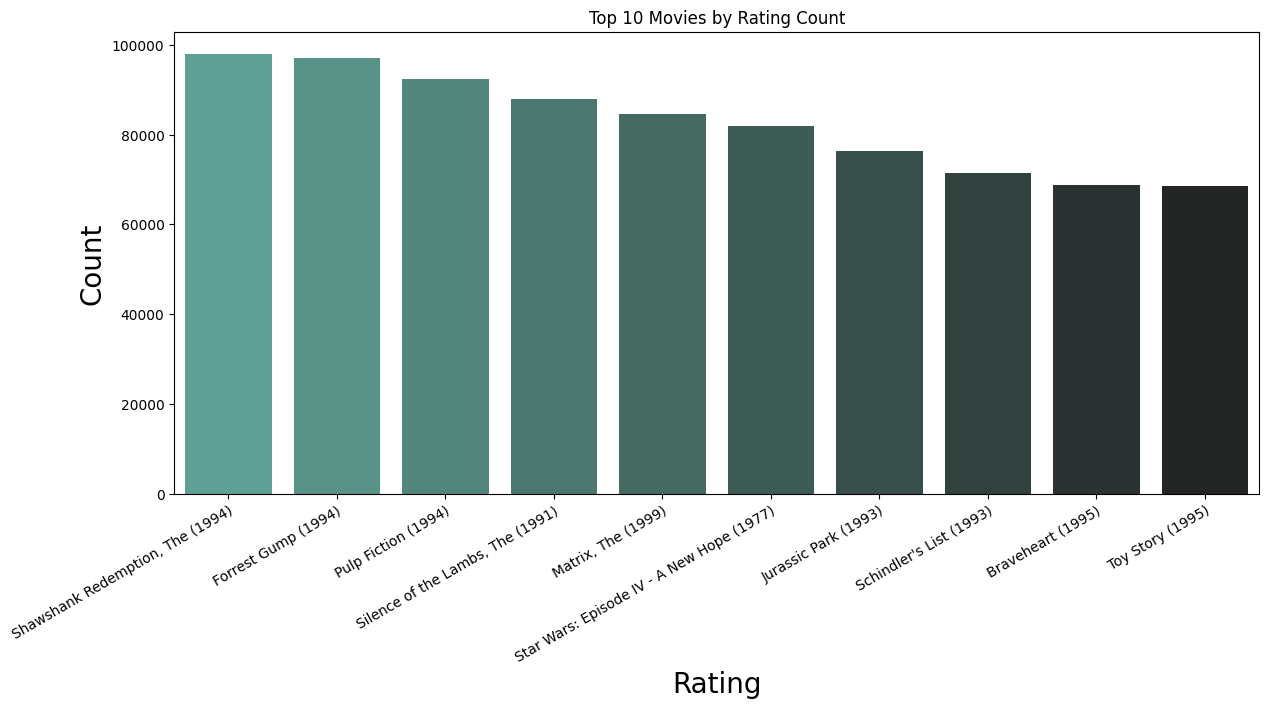

In [15]:
# Making a new df for only rating to save speed.
# df_cleaned_list = df_merged.drop(["timestamp", "genres"], axis=1)

def movie_ratings(df_merged, title):
    # get the top 10 movies with the most ratings
    df_top10_most_ratings = df_merged.groupby('title')['userId'].count().nlargest(10)
    
    # get the count of ratings for each rating level for the top 10 movies
    df_top10_ratings = df_merged[df_merged['title'].isin(df_top10_most_ratings.index)].groupby('rating')['userId'].count()
    
    # get the count of ratings for the specified movie
    unique_movie_counts = df_merged[df_merged['title'] == title]['title'].value_counts().values[0]
    return df_top10_most_ratings, unique_movie_counts

# call the movie_ratings function with the dataframe and the title of the movie
df_top10_ratings, unique_movie_counts = movie_ratings(df_merged, 'Toy Story (1995)')

# print("Top 10 movies with the most ratings by rating level:\n", df_top10_ratings)

# create a barplot of the top 10 movies by rating count
plt.figure(figsize=(14, 6))
sns.barplot(x=df_top10_ratings.index, y=df_top10_ratings.values, palette="dark:#5A9_r")
plt.title('Top 10 Movies by Rating Count')
plt.xlabel('Rating', size = 20)
plt.ylabel('Count', size = 20)
plt.xticks(rotation=30, rotation_mode="anchor", ha="right")


plt.show()

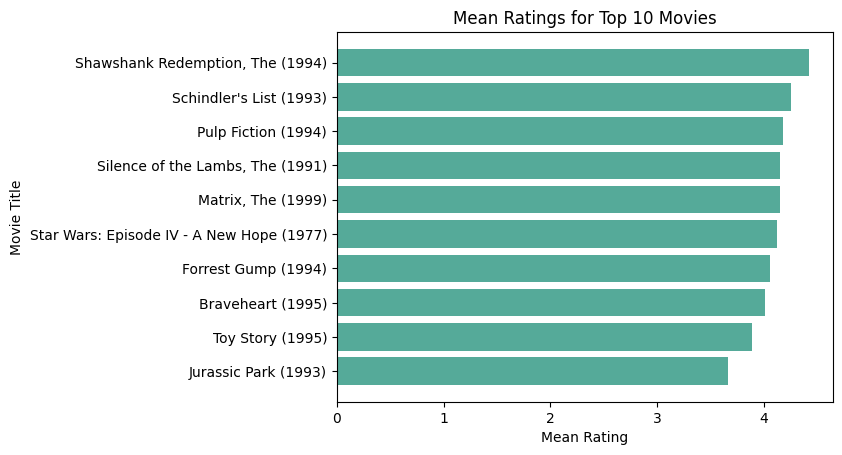

In [16]:
df_mean_ratings = df_merged[df_merged['title'].isin(df_top10_ratings.index)].groupby('title')['rating'].mean()
df_mean_ratings_sorted = df_mean_ratings.sort_values(ascending=True)

color = '#5A9'

# create a horizontal bar plot of the mean ratings
plt.barh(df_mean_ratings_sorted.index, df_mean_ratings_sorted.values, color=color)
# set the title and labels for the plot
plt.title('Mean Ratings for Top 10 Movies')
plt.xlabel('Mean Rating')
plt.ylabel('Movie Title')

# display the plot
plt.show()


In [17]:
# Exctracting years from title and making a new column
df_merged['year'] = df_merged['title'].str.extract('\((\d{4})\)', expand=False)

# # Making a copy so i don't have to restart the whole dataset
# df_ = df_merged.copy()

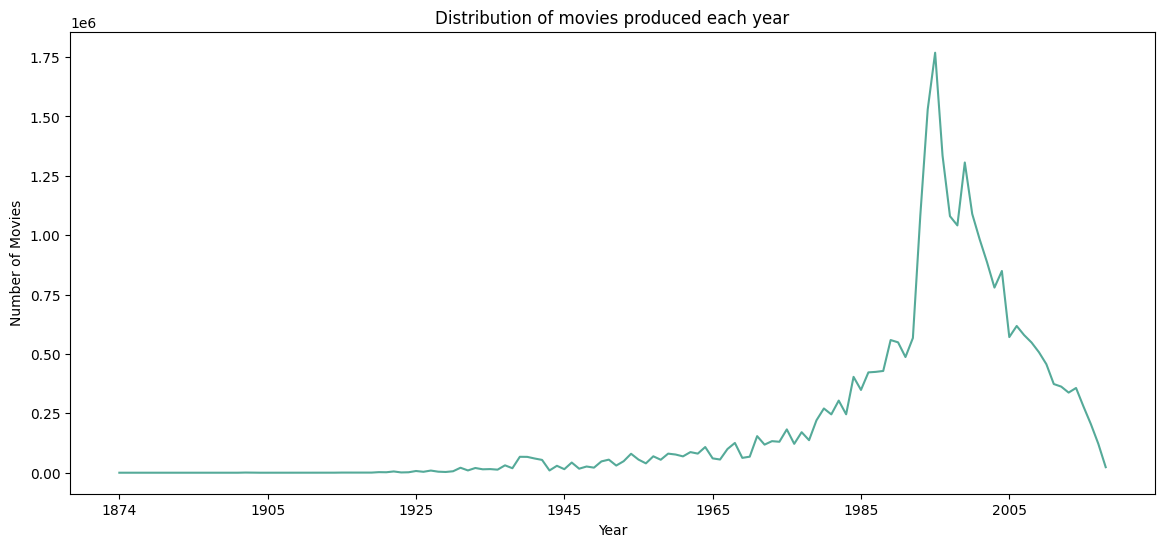

In [18]:
movies_produced = df_merged.groupby('year')['title'].count()

plt.figure(figsize=(14, 6))

movies_produced.plot(kind="line", color='#5A9')

plt.title("Distribution of movies produced each year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

In [19]:
df_merged.head()

,userId,movieId,rating,title,year
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
3,71,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
4,84,307,3.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993


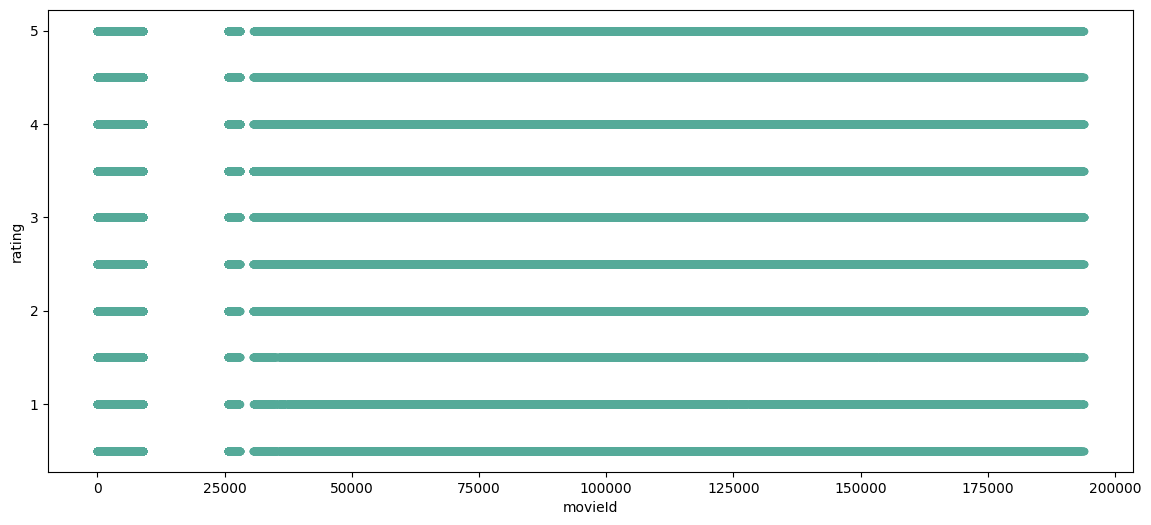

In [20]:
df_merged.plot.scatter('movieId', 'rating', color='#5A9', figsize=(14, 6))
plt.show()

In [21]:
# TODO: Calculate the mean ratings for the top10 movies with the most ratings, make a stapel diagram from this
# TODO: More EDA on the data 

# TODO: There is a logical error in the video guide. (Might have something to do with the quote below)
       # "Hi, while you are trying not to present the recommendation of 'toy story' itself, by adding: print(df_movies['title'][i].where(i!=idx))
        # you still have that in the first line as NaN"

       # Maybe it is because in df_movies movield the toy story has index 0? Somehow it can mess with
       # everything since we fillna 0 values to rating

# More EDA
Plot the counts of each rating


In [22]:
df_ratings["rating"].value_counts()

4.0    7394710
3.0    5515668
5.0    4071135
3.5    3404360
4.5    2373550
2.0    1850627
2.5    1373419
1.0     886233
0.5     442388
1.5     441354
Name: rating, dtype: int64

In [23]:
# We want it to return as a DF not a series object
df_ratings_count = pd.DataFrame(df_ratings.groupby('rating').size(), columns=['count'])
df_ratings_count

,count
rating,
0.5,442388
1.0,886233
1.5,441354
2.0,1850627
2.5,1373419
3.0,5515668
3.5,3404360
4.0,7394710
4.5,2373550


We want to include the 0 rating aswell because it didn't count

In [24]:
# gets the total number of ratings
df_ratings_total = num_users * num_items

# df_ratings.shape extracts the number of rows of the df
raiting_zero_count = df_ratings_total - df_ratings.shape[0]

df_ratings_count = df_ratings_count.append(pd.DataFrame({'count': raiting_zero_count}, index=[0.0]), verify_integrity=True).sort_index()
df_ratings_count


/var/folders/q6/3g_x1fsd1gj1bssql2_z81c40000gn/T/ipykernel_60909/3314970404.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratings_count = df_ratings_count.append(pd.DataFrame({'count': raiting_zero_count}, index=[0.0]), verify_integrity=True).sort_index()


,count
0.0,15235120248
0.5,442388
1.0,886233
1.5,441354
2.0,1850627
2.5,1373419
3.0,5515668
3.5,3404360
4.0,7394710
4.5,2373550


We will use log scaling because it is easier to read a graph with the above values so we can allow a large range be displayed, so we don't compress the small values in the botton of the graph.

https://stats.stackexchange.com/questions/27951/when-are-log-scales-appropriate

In [25]:
# Rating frequency of all movies, only a small group of movies have a lot of ratings
df_movies_count = pd.DataFrame(df_ratings.groupby('movieId').size(), columns=['count'])
df_movies_count.head()

,count
movieId,
1,68469
2,27143
3,15585
4,2989
5,15474


In [26]:
df_movies_count.describe()

,count
count,53889.000000
mean,515.011301
std,2934.758939
min,1.000000
25%,2.000000
50%,7.000000
75%,48.000000
max,97999.000000


* We have 53889 movies. From these movies we can see that 75% of the movies has been rated less than 48 times. So i will drop all the movies that hasn't gotten enough of reviews. 
* This will give me roughly 13,500 different movies in our dataset, and that is still a good amount for the modeling. 

* I want to filter out movies so i don't run into "MemoryError" during model training and when i'm creating the sparse matrix

In [35]:
# https://www.youtube.com/watch?v=kccT0FVK6OY some of the sources i used

# Set the popularity threshold for movies to 50
popularity_threshold = 50

# Filter the df_movies_count DataFrame to only include movies with a count greater than or equal to the popularity threshold
# Convert the resulting DataFrame index to a set, then convert that set to a list of popular movies
popular_movies = list(set(df_movies_count.query('count >= @popularity_threshold').index))

# Create a new DataFrame, df_ratings_drop_movies, by filtering the df_ratings DataFrame to only include movies in the popular_movies list
df_ratings_drop_movies = df_ratings[df_ratings.movieId.isin(popular_movies)]

# Print the shape (number of rows and columns) of the original df_ratings DataFrame
print('shape of original ratings data: ', df_ratings.shape)

# Print the shape of the new df_ratings_drop_movies DataFrame
print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop_movies.shape)

print(f"Number of movies is reduced from {len(df_ratings['movieId'].unique())} to {len(df_ratings_drop_movies['movieId'].unique())}")

shape of original ratings data:  (27753444, 3)
shape of ratings data after dropping unpopular movies:  (27430748, 3)
Number of movies is reduced from 53889 to 13360


We have filtered out roughly 75% of different movies in our dataset, but it is still a big dataset. 
* So the next step is to reduce the size of the data even more. This we can do by filter the users in the dataframe

In [36]:
df_ratings_drop_movies

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
...,...,...,...
27753439,283228,8542,4.5
27753440,283228,8712,4.5
27753441,283228,34405,4.5
27753442,283228,44761,4.5


In [37]:
# number of ratings given by each user
# And i want to return this as a pd.DataFrame not a series object
df_user_count = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=['count'])
df_user_count.head()

,count
userId,
1,16
2,15
3,11
4,736
5,72


Text(0, 0.5, 'number of ratings')

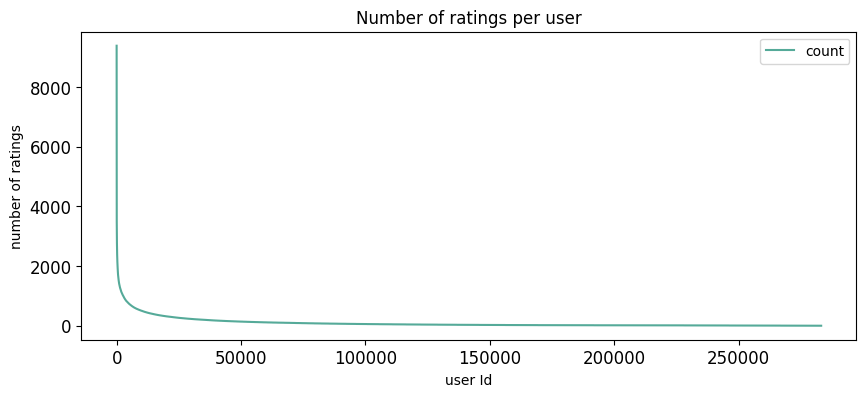

In [38]:
ax = df_user_count.sort_values('count', ascending=False).reset_index(drop=True).plot(figsize=(10,4),title='Number of ratings per user', color='#5A9', fontsize=12)

ax.set_xlabel('user Id')
ax.set_ylabel("number of ratings")

In [39]:
df_user_count.describe()

,count
count,283113.000000
mean,96.889751
std,200.773056
min,1.000000
25%,15.000000
50%,30.000000
75%,94.000000
max,9384.000000


If we look at the users it's kinda similar to the way the distribution of ratings among movies is distributed. Only a small group of users are the ones who actually gives ratings. 
So we want to filter out the users who have given less than 50 ratings. 

In [58]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html
# https://www.youtube.com/watch?v=kccT0FVK6OY

# selecting count column 
# np.arrange(1, 0.5, -0.05) from 1 to 0.5 in steps of -0.05
# calculates quantiles for values at 100% 95% 90% ... 50%
# This makes so i can see the distribution clearer

df_user_count['count'].quantile(np.arange(1, 0.5, -0.05))

1.00    9384.0
0.95     403.0
0.90     239.0
0.85     164.0
0.80     121.0
0.75      94.0
0.70      73.0
0.65      58.0
0.60      47.0
0.55      37.0
Name: count, dtype: float64

In [45]:
df_user_count.head()

,count
userId,
1,16
2,15
3,11
4,736
5,72


In [51]:
ratings_threshold = 50
users = list(set(df_user_count.query('count >= @ratings_threshold').index))
df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.userId.isin(users)]
print(f"shape of original ratings data: {df_ratings.shape}")
print('shape of ratings data after dropping unpopular movies and inactive users: ', df_ratings_drop_users.shape)

# TODO: Make this comment more clear and correct
print(f"Number of users is reduced from {len(df_ratings_drop_users['userId'].unique())} to {len(df_user_count['count'].unique())}")


shape of original ratings data: (27753444, 3)
shape of ratings data after dropping unpopular movies and inactive users:  (24178982, 3)
Number of users is reduced from 109483 to 2098


In [52]:
df_ratings_drop_users.head()

,userId,movieId,rating
42,4,1,4.0
43,4,2,4.0
44,4,5,2.0
45,4,6,4.5
46,4,10,4.0


In [ ]:
# movies_produced = df_merged.groupby('year')['title'].count()

# plt.figure(figsize=(14, 6))

# movies_produced.plot(kind="line", color='#5A9')

# plt.title("Distribution of movies produced each year")
# plt.xlabel("Year")
# plt.ylabel("Number of Movies")
# plt.show()

## 1.2 sparse matrix

In [ ]:
df_merged.head()

,userId,movieId,rating,title,year
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
3,71,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
4,84,307,3.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993


In [ ]:
df_.info()

NameError: name 'df_' is not defined

In [ ]:
ratings = ratings.drop("timestamp", axis=1)
print(ratings)

KeyError: "['timestamp'] not found in axis"

In [ ]:
# Calculate the number of ratings per movie
number_of_ratings = ratings.groupby('movieId')['rating'].count().reset_index()
number_of_ratings["rating"].describe()

count    53889.000000
mean       515.011301
std       2934.758939
min          1.000000
25%          2.000000
50%          7.000000
75%         48.000000
max      97999.000000
Name: rating, dtype: float64

We have 53889 movies. From these movies we can see that 75% of the movies has been rated less than 48 times. So i will drop all the movies that hasn't gotten enough of reviews.

In [ ]:
# I want to get the movies with less than 48 ratings
movies_to_remove = number_of_ratings[number_of_ratings["rating"] < 48]["movieId"].values

reduced_ratings = ratings[~ratings["movieId"].isin(movies_to_remove)]
reduced_ratings
print(f"Number of movies is reduced from {len(ratings['movieId'].unique())} to {len(reduced_ratings['movieId'].unique())}")
print(f"Number of rows reduced are {len(ratings) - len(reduced_ratings)}")

# df_movies_cnt = reduced_ratings

Number of movies is reduced from 53889 to 13534
Number of rows reduced are 314250


In [ ]:
reduced_ratings['count'].quantile(np.arrange(1, 0.6, -0.05))

KeyError: 'count'

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# movies_users = reduced_ratings.pivot(index="movieId", columns="userId", values="rating").fillna(0)

/var/folders/q6/3g_x1fsd1gj1bssql2_z81c40000gn/T/ipykernel_58795/2756298486.py:1: PerformanceWarning: The following operation may generate 3831664876 cells in the resulting pandas object.
  movies_users = reduced_ratings.pivot(index="movieId", columns="userId", values="rating").fillna(0)


In [ ]:
movies_users.head()

userId,1,2,3,4,5,6,7,8,9,10,...,283219,283220,283221,283222,283223,283224,283225,283226,283227,283228
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# We need to use cosine similarity because euclidean distance is not so good in high dimensions TODO: Continute write here

In [ ]:
from sklearn.neighbors import NearestNeighbors

# model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [ ]:
def make_recommendations(self, fav_movie, n_recommendations):
    """ Make top n movie recommendations
    Param::
    fav_movie: str, name of user input movie
    n_recommendations: int, top n recommendations
    """
    # get data
    movie_user_mat_sparse

In [ ]:
# Reset index for the pivoted data, so that movieId can be reached
movies_users = movies_users.reset_index()
movies_users

In [ ]:
# # Creating a sparse matrix
# movies1 = pd.Categorical(reduced_ratings['movieId'])
# users = pd.Categorical(reduced_ratings['userId'])
# mat_movies_users = csr_matrix((reduced_ratings['rating'], (movies1.codes, users.codes)))

# print(mat_movies_users)

  (0, 3)	4.0
  (0, 9)	5.0
  (0, 13)	4.5
  (0, 14)	4.0
  (0, 21)	4.0
  (0, 24)	4.0
  (0, 26)	5.0
  (0, 30)	5.0
  (0, 31)	4.5
  (0, 37)	5.0
  (0, 41)	4.0
  (0, 42)	5.0
  (0, 50)	4.0
  (0, 53)	3.0
  (0, 54)	5.0
  (0, 55)	2.5
  (0, 57)	4.0
  (0, 61)	4.0
  (0, 66)	4.0
  (0, 69)	4.0
  (0, 70)	4.0
  (0, 72)	4.0
  (0, 73)	5.0
  (0, 78)	5.0
  (0, 98)	4.5
  :	:
  (13533, 195838)	3.0
  (13533, 204823)	2.0
  (13533, 220627)	2.0
  (13533, 225560)	3.0
  (13533, 228158)	4.0
  (13533, 230724)	4.0
  (13533, 231723)	5.0
  (13533, 233492)	2.5
  (13533, 234826)	3.5
  (13533, 235978)	3.5
  (13533, 237009)	2.5
  (13533, 241790)	0.5
  (13533, 242413)	3.0
  (13533, 245295)	2.5
  (13533, 248974)	2.0
  (13533, 251066)	2.5
  (13533, 260295)	2.5
  (13533, 261785)	3.0
  (13533, 265447)	1.0
  (13533, 269565)	3.0
  (13533, 270467)	3.0
  (13533, 272354)	5.0
  (13533, 275734)	1.5
  (13533, 279412)	3.0
  (13533, 279603)	3.0


# KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Using brute because traverse thru all datapoints in the whole dataset 
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors= 20)

In [ ]:
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

# Recommender system

In [ ]:
# def recommender(movie_name, data, model, n_recommendations):
#     model.fit(data)
#     idx=process.extractOne(movie_name, movies['title'])[2] 
#     print('Movie Selected: ', movies['title'][idx], 'Index: ', idx)
#     print('Searching for recommendations......')
#     # We specified the index from one movie to find similar movies
#         # We got the movie index from what we extracted with help of fuzzywuzzy
#     distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)

#     # What we get out is the closest similarities but outcommented this and created a for loop
#     # print(distances, indices)

#     # We want all indices close to 100%
#     # We dont want to compare toy story to toy story therefor i!=idx
#     for i in indices:
#         print(movies['title'][i].where(i!=idx))

# recommender('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)', mat_movies_users, model_knn,20)

Movie Selected:  Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981) Index:  1173
Searching for recommendations......
1173                                                  NaN
1083        Children of the Corn IV: The Gathering (1996)
1888    Nightmare on Elm Street 4: The Dream Master, A...
1081                         Rebel Without a Cause (1955)
945                        They Made Me a Criminal (1939)
1094           Eighth Day, The (Huitième jour, Le) (1996)
1122                                    Snowriders (1996)
1152                                  Delicatessen (1991)
250     Interview with the Vampire: The Vampire Chroni...
1085                                         Loser (1991)
2443                                     Westworld (1973)
1098                                    Glory Daze (1995)
1415    Prisoner of the Mountains (Kavkazsky plennik) ...
2315                        Santa Claus: The Movie (1985)
563                             Bhaji on th

# TODO: Filter out all the movies that was created after 1980. Because i don't want to see older movies. I want more modern movies


# TODO: Filter out all the movies that had a lower average rating of 2. rating > 2
# TODO: Filter out the movies so it has a total rating count for each movie
# TODO: Drop the columns that i will not need. TODO: Make the decision which columns i don't want. for instance 'year'
# TODO: Now see how big the dataset is. 

In [ ]:
# Filln NaN values with 0, because my column named 'year' has NaN values
df_ = df_.fillna(0)
df_.isna().sum()

userId     0
movieId    0
rating     0
title      0
year       0
dtype: int64

In [ ]:
df_.shape

# 24323428 rows × 4 columns as of now

(27753444, 5)

In [ ]:
# def filter_dataframe(df_):

# Converting the year column to int
df_['year'] = df_['year'].astype(int)

# Filter out all movies created before 1980 because we want a movie recommendations for more modern movies. This will not remove a lot of movies though
# because the bulk of the movies was created after 1980
filtered_df = df_[df_['year'] >= 1980]

# now drop the column year since we don't need it anymore, and to save computer speed
filtered_df = filtered_df.drop(['year'], axis=1)
print(f"Number of rows filtered out: {df_.shape[0] - filtered_df.shape[0]}")


# replace the rating column with average rating for each movie
# filtered_df['rating'] = filtered_df.groupby('movieId')['rating'].transform('mean')

filtered_df

# Now we want to drop all the movies with a rating less than 2.0 in rating
# I do this AFTER i have sorted the average rating
# filtered_df = filtered_df[filtered_df['rating'] >= 2.0]

# We want to get the group the total rating for each movie 


Number of rows filtered out: 3430016


,userId,movieId,rating,title
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993)
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,71,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
4,84,307,3.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
...,...,...,...,...
27753438,282374,180713,4.5,Utopia Blues (2000)
27753439,282403,167894,1.0,Stranglehold (1994)
27753441,283000,117857,3.5,Hotline (2014)
27753442,283000,133409,3.5,Barnum! (1986)


In [ ]:
filtered_df = df_[df_['year'] > 1980]
filtered_df

,userId,movieId,rating,title,year
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
3,71,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
4,84,307,3.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),1993
...,...,...,...,...,...
27753438,282374,180713,4.5,Utopia Blues (2000),2000
27753439,282403,167894,1.0,Stranglehold (1994),1994
27753441,283000,117857,3.5,Hotline (2014),2014
27753442,283000,133409,3.5,Barnum! (1986),1986


# TODO: Filter out all the movies that was created after 1980. Because i don't want to see older movies. I want more modern movies


# TODO: Filter out all the movies that had a lower average rating of 2. rating > 2
# TODO: Filter out the movies so it has a total rating count for each movie
# TODO: Drop the columns that i will not need. TODO: Make the decision which columns i don't want. for instance 'year'
# TODO: Now see how big the dataset is. 

In [ ]:
# To be able to create a sparse matrix i need to filter out my dataset to save computer power
# I will only use the movies

# I need to create a total ratings per movie 
